## Importing Liabraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [2]:
data = pd.read_csv('../global_heat_index.csv')

In [3]:
data.head(20)

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0
5,2011,1,1,5,1,8.098655,985.723206,65.278494,89.290062,1.937899,0
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363


<font color = 'red'> here we can see that before 7 solar radiation is 0 ( as it is night) and after 18 (6pm) again SR is 0 as the sun sets<br><b> so this data is not at all needed so we will clean it


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   17520 non-null  int64  
 1   Month                  17520 non-null  int64  
 2   Day                    17520 non-null  int64  
 3   Hour                   17520 non-null  int64  
 4   Dew Point              17520 non-null  int64  
 5   Temperature            17520 non-null  float64
 6   Pressure               17520 non-null  float64
 7   Relative Humidity      17520 non-null  float64
 8   Wind Direction         17520 non-null  float64
 9   Wind Speed             17520 non-null  float64
 10  Solar Radiation (GHI)  17520 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.5 MB


## <font color ='blue'> Cleaning Data

cleaning before 6 AM and after 6 PM data

In [5]:
clean1 = data[data['Hour'] < 6]
clean2 = data[data['Hour'] > 18]

In [6]:
#now we can drop this both from the main 'data'

data = data.drop(clean1.index , axis = 0)
data = data.drop(clean2.index , axis = 0)

In [7]:
data.head(20)

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363
10,2011,1,1,10,3,18.956082,988.054504,36.747087,72.488327,0.545695,533
11,2011,1,1,11,2,21.354047,987.463867,29.157015,12.976929,0.980117,649
12,2011,1,1,12,2,22.161257,986.386169,27.593071,4.777779,1.411915,698
13,2011,1,1,13,2,22.256216,985.736511,27.274695,5.355347,1.747909,675
14,2011,1,1,14,2,21.725884,985.521545,27.819289,6.877182,2.005287,582
15,2011,1,1,15,2,20.507269,985.279663,30.023284,10.448921,2.206879,430


<font color = 'red'> kept 6 and 7 hours so that if there is radiation in case we wont miss out

## Input and Output

In [8]:
x = data.iloc[:,0:10]
y = data.iloc[:,-1]

In [9]:
#now we can also scale our data

# <font color ='green' >Corelation Matrix with HeatMap

In [10]:
corr_matrix = data.corr()
features = corr_matrix.index
features

Index(['Year', 'Month', 'Day', 'Hour', 'Dew Point', 'Temperature', 'Pressure',
       'Relative Humidity', 'Wind Direction', 'Wind Speed',
       'Solar Radiation (GHI)'],
      dtype='object')

# Visualizing HeatMap

<AxesSubplot:>

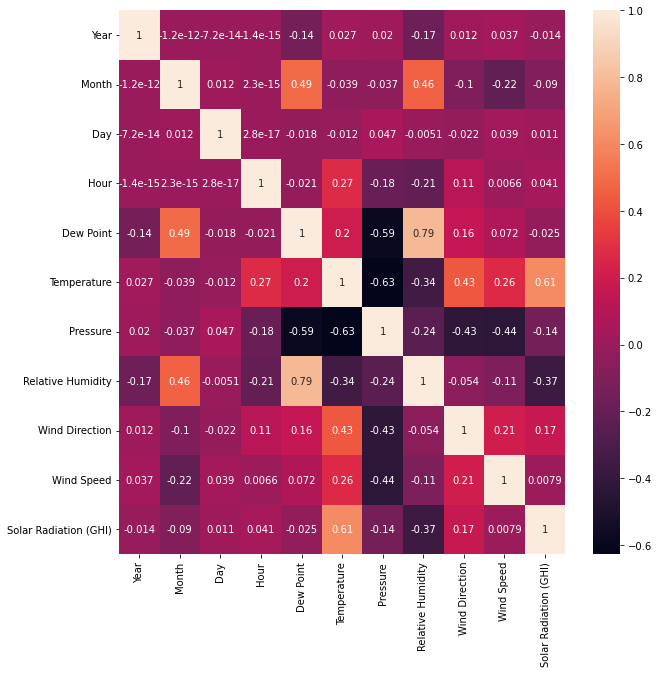

In [13]:
plt.figure(figsize=(10,10))

sns.heatmap(data[features].corr() , annot = True)

<font color = 'red'> 
1. Here we can see tempreture has gretest co relation with SR - 0.61 (61%)<br>
2. Here we can see Day has leset with SR - 0.011 (1.1 %)<br>
3. Here we can see -ve values in Years and months - simply removed as have no relation